<a href="https://colab.research.google.com/github/hassan-eltinay/Events_UI_App/blob/master/Amazon_Sales_Slash_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing** **Libraries**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from google.colab import files
uploaded = files.upload()

#**Exploratory Data Analysis**

##Data Inspection

In [6]:
dataset = pd.read_csv(io.StringIO(uploaded['Amazon Sale Report (1).csv'].decode('utf-8')))
dataset

<ipython-input-6-11c474276778>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(io.StringIO(uploaded['Amazon Sale Report (1).csv'].decode('utf-8')))


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

##Summary Statistics

###Numerical Variables Statistics

In [8]:
dataset.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


###Categorical Variables Statistics

In [9]:
dataset.describe(exclude=['int64', 'float64'])

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,128975,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,2,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,128104,39277,79925


##**Data Preprocessing**

###Removing irrelevant columns

In [10]:
#I explain why I chose to remove these columns specifically in the Documentation
dataset = dataset.drop(columns=['Unnamed: 22','fulfilled-by','B2B','promotion-ids','Courier Status', 'Fulfilment'])

In [11]:
# These are the relevant columns for our analysis
dataset.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country'],
      dtype='object')

###Identifying and Dealing with Missing Values

In [12]:
dataset.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
dtype: int64

In [13]:
#Since all missing values represent only 6% of the dataset ((7795+33)/128975*100), we can simply drop all of them without affecting the quality of the dataset
dataset = dataset.dropna()

###Data Type Conversion

In [14]:
#Some columns need type conversion, such as the Date column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121149 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121149 non-null  int64  
 1   Order ID            121149 non-null  object 
 2   Date                121149 non-null  object 
 3   Status              121149 non-null  object 
 4   Sales Channel       121149 non-null  object 
 5   ship-service-level  121149 non-null  object 
 6   Style               121149 non-null  object 
 7   SKU                 121149 non-null  object 
 8   Category            121149 non-null  object 
 9   Size                121149 non-null  object 
 10  ASIN                121149 non-null  object 
 11  Qty                 121149 non-null  int64  
 12  currency            121149 non-null  object 
 13  Amount              121149 non-null  float64
 14  ship-city           121149 non-null  object 
 15  ship-state          121149 non-null  ob

In [15]:
dataset['Date']=dataset['Date'].astype('datetime64[ns]')

<ipython-input-15-bd6bfdac78f8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Date']=dataset['Date'].astype('datetime64[ns]')
<ipython-input-15-bd6bfdac78f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Date']=dataset['Date'].astype('datetime64[ns]')


###Identifying Outliers in Numerical Columns

<Axes: >

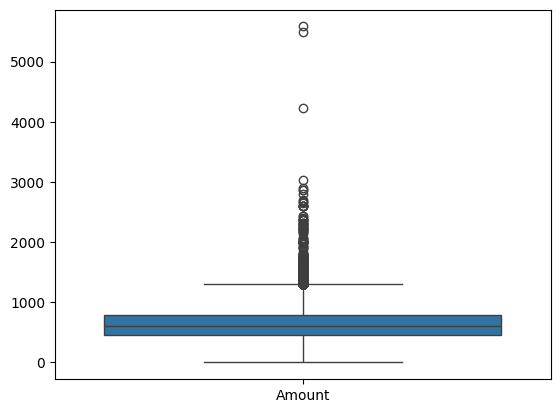

In [16]:
#As the boxplot shows, our Amount column contains many outliers that need treatment
sns.boxplot(data=dataset[['Amount']])

In [17]:
#First we find our 1st quartile, 3rd quartile and the Interquartile range
Q1 = dataset['Amount'].quantile(0.25)
Q3 = dataset['Amount'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

449.0
788.0
339.0


In [18]:
#Then, outliers represent any value above the upper T-shaped whisker(Q3+1.5*IQR), as is clear from the boxplot earlier
outliers = dataset['Amount'] > (Q3+1.5*IQR)
upper_tshaped_whisker = (Q3+1.5*IQR)
print(outliers)
print(upper_tshaped_whisker)

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Name: Amount, Length: 121149, dtype: bool
1296.5


###Treatment of Outliers

In [19]:
#Instead of removing them, we are going to replace the outliers with the median value of our Amount column, which is equal to 605 as we can see from the table below
dataset.describe()

,index,Date,Qty,Amount,ship-postal-code
count,121149.000000,121149,121149.000000,121149.000000,121149.000000
mean,64483.736259,2022-05-12 12:10:09.404947712,0.961246,648.573305,463652.687525
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32290.000000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64474.000000,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,96681.000000,2022-06-04 00:00:00,1.000000,788.000000,600021.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,37221.261564,NaN,0.214327,281.222115,191316.128616


In [20]:
#So, we will now replace the values above 1296.5 with the median, which is 605, to do this we'll need to import numpy
import numpy as np
dataset['Amount']=np.where(dataset['Amount'] > 1296.5, 605, dataset['Amount'])

<Axes: >

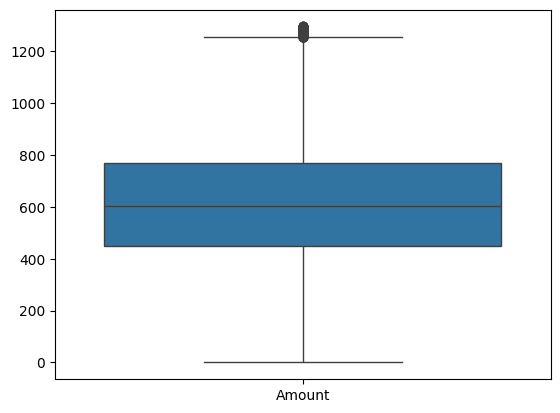

In [21]:
#And now as we can see, the treatment of the outliers is complete
sns.boxplot(data=dataset[['Amount']])

##**Data Vizualization**

###Monthly Sales Trends





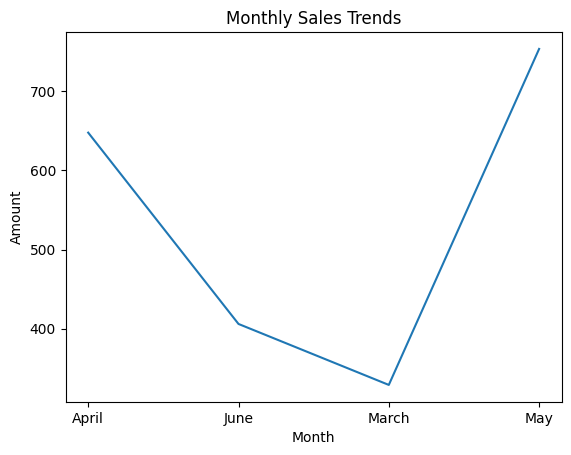

In [22]:
# Extract month
dataset["Month"] = dataset["Date"].dt.month_name()

# Group by month and sum  amount
monthly_sales = dataset.groupby(["Month"])["Amount"].sum().reset_index()

# Create time series plot with seaborn
sns.lineplot(x='Month', y=dataset['Amount'], data=monthly_sales)
plt.title("Monthly Sales Trends")

plt.show()

###Top-Selling Products by Quantity

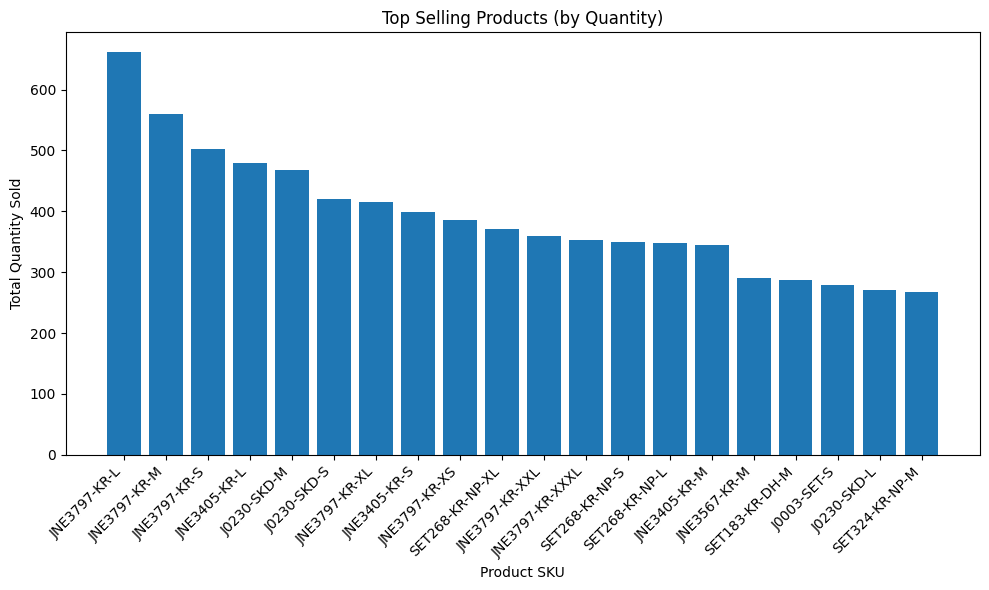

In [23]:
# Top selling products by quantity
top_products = (
    dataset.groupby("SKU")["Qty"]
    .sum()
    .reset_index()
    .sort_values(by="Qty", ascending=False)
    .head(20)  # Adjust limit for top 20
)

plt.figure(figsize=(10, 6))
plt.bar(top_products["SKU"], top_products["Qty"])
plt.xlabel("Product SKU")
plt.ylabel("Total Quantity Sold")
plt.title("Top Selling Products (by Quantity)")
plt.xticks(rotation=45, ha="right")  # Rotate and right-align x-axis labels
plt.tight_layout()
plt.show()



###Top-Selling Categories by Quantity

Text(0.5, 1.0, 'Top Selling Categories')

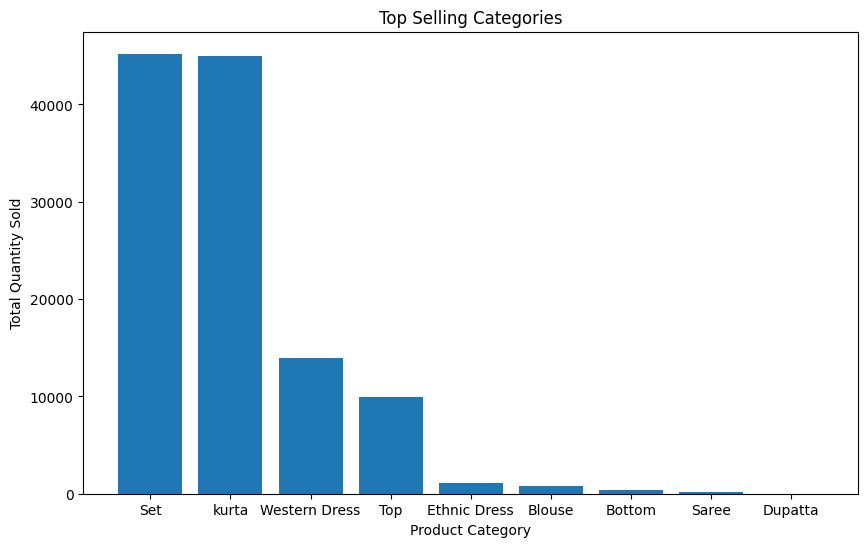

In [24]:
# Top selling categories by quantity
top_categories = (
    dataset.groupby("Category")["Qty"]
    .sum()
    .reset_index()
    .sort_values(by="Qty", ascending=False)
    .head(20)  # Adjust limit for top 20
)

plt.figure(figsize=(10, 6))
plt.bar(top_categories["Category"], top_categories["Qty"])
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.title("Top Selling Categories")

###Regional Sales Distributions

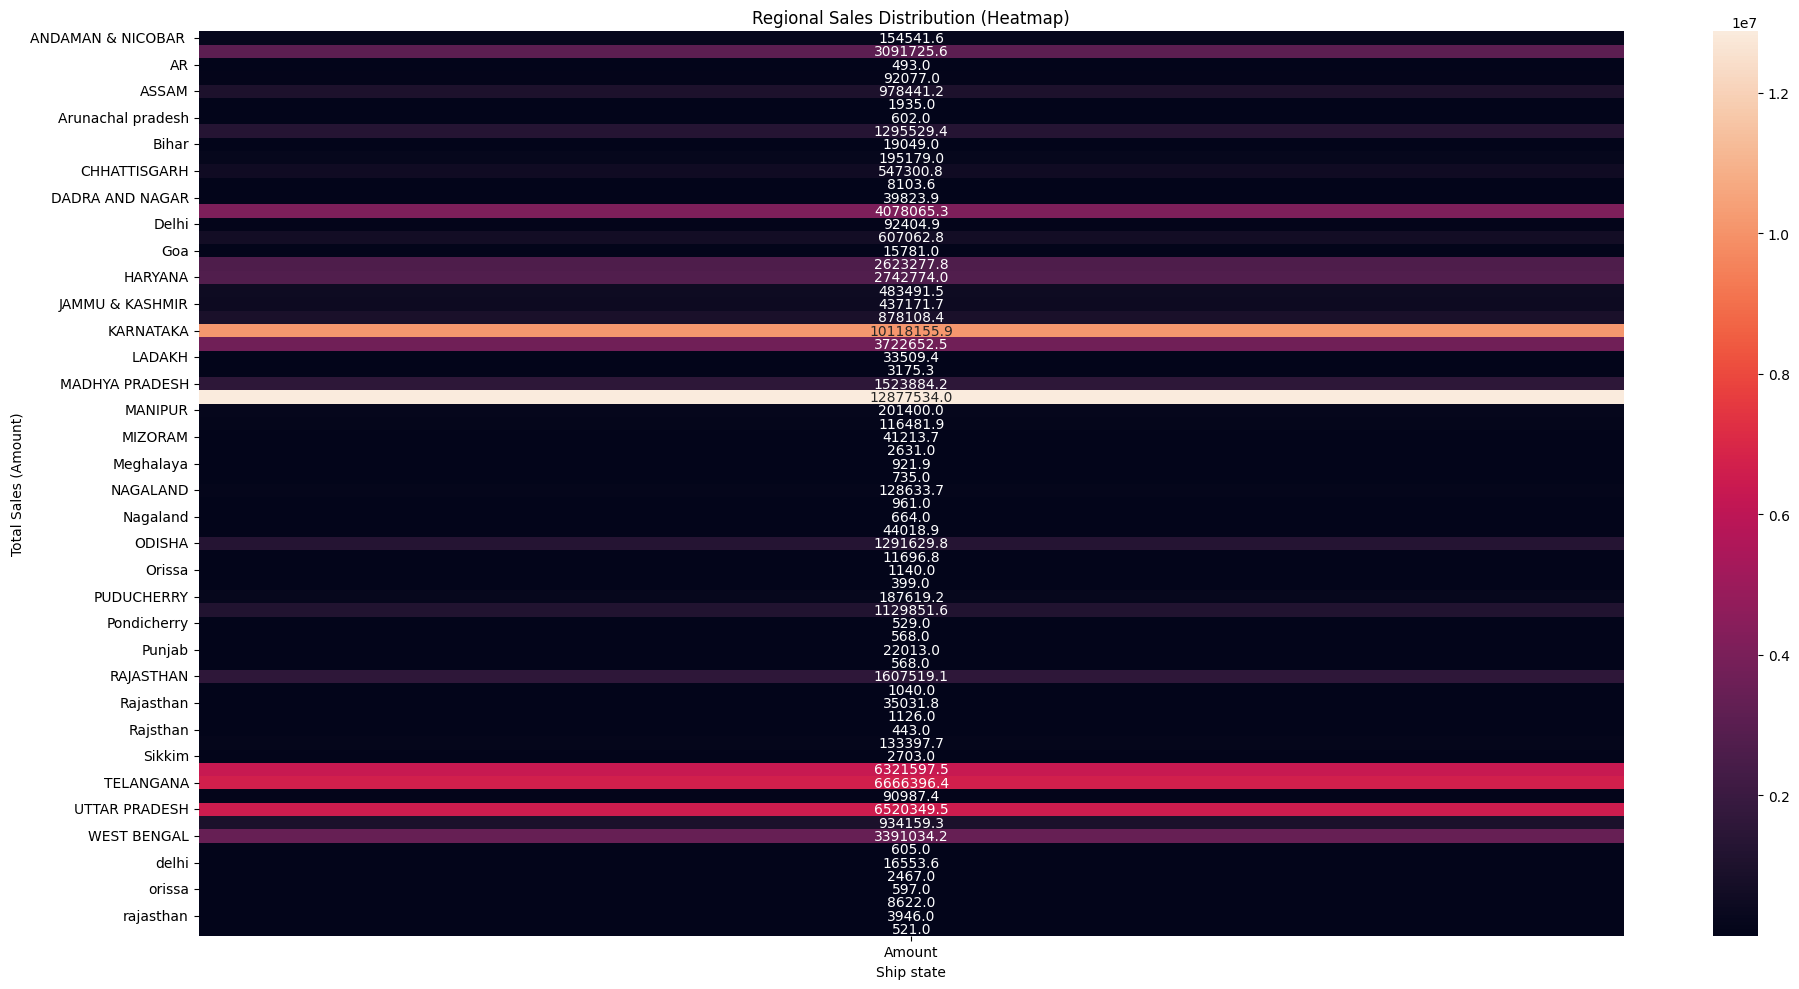

In [25]:
# Group by country and calculate total sales (or amount)
country_sales = dataset.groupby("ship-state")["Amount"].sum().reset_index()

# Pivot table for heatmap (uncomment if using state/city data)
pivot_table = pd.pivot_table(dataset, values='Amount', index='ship-state', columns='ship-city', aggfunc=sum)

# Create heatmap
plt.figure(figsize=(20, 10))
pivot_table = country_sales.pivot_table(values="Amount", index="ship-state", aggfunc=sum)  # Uncomment for state/city data
sns.heatmap(pivot_table, annot=True, fmt=".1f")  # Use sns.heatmap for colorbar and annotations
plt.xlabel("Ship state")
plt.ylabel("Total Sales (Amount)")
plt.title("Regional Sales Distribution (Heatmap)")
plt.tight_layout()
plt.show()


###Map Distribution by State

In [1]:
from folium import Map, Marker, FeatureGroup

# Sample data (replace with actual data)
latitudes = [11.059821, 17.123184, 23.473324	, 29.238478, 21.295132, 29.065773, 25.794033,
             19.601194, 23.745127, 17.874857, 15.317277, 10.850516, 28.207609, 26.244156, 19.663280,
             11.127123, 15.317277, 22.978624, 22.309425, 20.940920, 27.391277, 32.084206]  # latitudes of indian states
longitudes = [78.387451, 79.208824, 77.947998, 76.431885, 81.828232, 76.040497, 78.116531,
              75.552979, 91.746826, 78.100815, 75.713890, 76.271080, 79.826660, 92.537842, 75.300293,
              78.656891, 75.713890, 87.747803, 72.136230, 84.803467, 73.432617, 77.571167]  # longitudes of indian states

# Create base map (adjust starting location as needed)
m = Map(location=[20.5937, 78.96], zoom_start=3)  # Centered on India

# Create feature group for markers
fg = FeatureGroup(name="Sales Locations")

# Add markers with sales data (replace with your data)
for i in range(len(latitudes)):
    fg.add_child(
        Marker(location=[latitudes[i], longitudes[i]], popup=f"Sales: ${dataset['Amount'].iloc[i]}")
        )


# Add feature group to map
m.add_child(fg)
m

# (Optional) Save map as HTML file
# m.save("regional_sales.html")


NameError: name 'dataset' is not defined

##**Predictive Model**

In [ ]:
# Drop unnecessary columns (index and Order ID)
dataset.drop(columns=["index", "Order ID"], inplace=True)

# Separate features (X) and target variable (y)
X = dataset.drop("Status", axis=1)
y = dataset["Status"]

# Encode categorical features
categorical_features = [
    "Sales Channel ", "ship-service-level", "Style", "Category", "Size", "ASIN", "ship-city", "ship-state", "ship-country"
]
encoder = OneHotEncoder(sparse=False)  # One-Hot encoding for categorical features
encoded_data = pd.DataFrame(encoder.fit_transform(X[categorical_features]))
X = pd.concat([X.drop(categorical_features, axis=1), encoded_data], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
